# Mancala Game Implementation

In this assignment, you are tasked with implementing various functions for a Mancala game. The game is played on a board with specific rules, and you will need to implement the core game logic by completing the `play`, `valid_move`, and `winning_eval` functions. You are provided with the `init` and `display_board` functions. The assignment is divided into two parts:

## Mancala rules for this homework assignment
**(there are many different rules sets for Mancala.  Please read this before writing the code)**

* Players sit on opposite sides of the long edge of the board
* There are 6 small pits in the middle of the board and 2 large ones at each end.  The small ones in the middle and the large pit on your right are yours.  The small ones on the other side and the large pit to your opponent's right are theirs
* The large pits at the end of the board are called Mancalas
* Set up the board with 4 stones per small pit (none in the mancalas)
* On every turn, select a pit on your side of the board that contains one or more stones,  then distribute its stones, one stone per pit, in an counter-clockwise direction until you have no stones remaining
* If you encounter your opponent's mandala, skip it
* If you encounter your mancala, drop a stone into it
* If the last stone lands in an empty pit on your side of the board, capture this stone and any stones in your opponent's pit on the other side of the board, collect all of these stones, including the one that just landed, and place them into your mancala.
* If either player's pits are entirely empty, the game concludes. 
* The player who still has stones on his side of the board when the game concludes places all of these pieces into their mancala.
The player with the most stones in their mancala is declared the winner. If both players have an equal number of stones in their mancala, the game results in a tie.


**Please make sure to call the `display_board` function after each move for both the parts and run all the cells before submitting**

In [2]:

import numpy as np


In [3]:
class Mancala:
    def __init__(self, pits_per_player=6, stones_per_pit = 4):
        """
        The constructor for the Mancala class defines several instance variables:

        pits_per_player: This variable stores the number of pits each player has.
        stones_per_pit: It represents the number of stones each pit contains at the start of any game.
        board: This data structure is responsible for managing the Mancala board.
        current_player: This variable takes the value 1 or 2, as it's a two-player game, indicating which player's turn it is.
        moves: This is a list used to store the moves made by each player. It's structured in the format (current_player, chosen_pit).
        p1_pits_index: A list containing two elements representing the start and end indices of player 1's pits in the board data structure.
        p2_pits_index: Similar to p1_pits_index, it contains the start and end indices for player 2's pits on the board.
        p1_mancala_index and p2_mancala_index: These variables hold the indices of the Mancala pits on the board for players 1 and 2, respectively.
        """
        self.pits_per_player = pits_per_player
        self.board = [stones_per_pit] * ((pits_per_player+1) * 2)  # Initialize each pit with stones_per_pit number of stones 
        self.players = 2
        self.current_player = 1
        self.moves = []
        self.p1_pits_index = [0, self.pits_per_player-1]
        self.p1_mancala_index = self.pits_per_player
        self.p2_pits_index = [self.pits_per_player+1, len(self.board)-1-1]
        self.p2_mancala_index = len(self.board)-1
        
        # Zeroing the Mancala for both players
        self.board[self.p1_mancala_index] = 0
        self.board[self.p2_mancala_index] = 0

    def display_board(self):
        """
        Displays the board in a user-friendly format
        """
        player_1_pits = self.board[self.p1_pits_index[0]: self.p1_pits_index[1]+1]
        player_1_mancala = self.board[self.p1_mancala_index]
        player_2_pits = self.board[self.p2_pits_index[0]: self.p2_pits_index[1]+1]
        player_2_mancala = self.board[self.p2_mancala_index]

        print('P1               P2')
        print('     ____{}____     '.format(player_2_mancala))
        for i in range(self.pits_per_player):
            if i == self.pits_per_player - 1:
                print('{} -> |_{}_|_{}_| <- {}'.format(i+1, player_1_pits[i], 
                        player_2_pits[-(i+1)], self.pits_per_player - i))
            else:    
                print('{} -> | {} | {} | <- {}'.format(i+1, player_1_pits[i], 
                        player_2_pits[-(i+1)], self.pits_per_player - i))
            
        print('         {}         '.format(player_1_mancala))
        turn = 'P1' if self.current_player == 1 else 'P2'
        print('Turn: ' + turn)
        
    def valid_move(self, pit):
        """
        Function to check if the pit chosen by the current_player is a valid move.
        """
        
        # write your code here
        if not (pit >= 1 and pit <= self.pits_per_player):
            return False
        if self.current_player == 1:
            return self.board[pit - 1] != 0
        else:
            return self.board[pit + self.pits_per_player] != 0
        
    def random_move_generator(self):
        """
        Function to generate random valid moves with non-empty pits for the random player
        """
        # write your code here

        if self.current_player == 1:
            player_1_pits = range(self.p1_pits_index[0], self.p1_pits_index[1] + 1)
            valid_player_1_pits = [i for i in player_1_pits if self.board[i] > 0]
            return np.random.choice(valid_player_1_pits) + 1

            
        else:
            player_2_pits = range(self.p2_pits_index[0], self.p2_pits_index[1] + 1)
            valid_player_2_pits = [i for i in player_2_pits if self.board[i] > 0]
            return np.random.choice(valid_player_2_pits) - self.pits_per_player


        
        
    
    def play(self, pit):
        """
        This function simulates a single move made by a specific player using their selected pit. It primarily performs three tasks:
        1. It checks if the chosen pit is a valid move for the current player. If not, it prints "INVALID MOVE" and takes no action.
        2. It verifies if the game board has already reached a winning state. If so, it prints "GAME OVER" and takes no further action.
        3. After passing the above two checks, it proceeds to distribute the stones according to the specified Mancala rules.

        Finally, the function then switches the current player, allowing the other player to take their turn.
        """

        _,over_or_not = self.winning_eval()
        if over_or_not:
                print("GAME OVER")
                return
        
        if not self.valid_move(pit):
                print("INVALID MOVE")
                return 
        
        if self.current_player == 1:
            stones_dist = self.board[pit - 1]
            self.board[pit - 1] = 0
            idx = (pit) % len(self.board)
            while stones_dist > 0:
                if idx == self.p2_mancala_index: 
                    idx = (idx + 1) % len(self.board)
                    continue
                if idx >= self.p1_pits_index[0] and idx <= self.p1_pits_index[1] and self.board[idx] == 0 and stones_dist == 1:
                    opposite_pit = self.p2_pits_index[1] - (idx - self.p1_pits_index[0])
                    stones_taken = self.board[opposite_pit]
                    self.board[opposite_pit] = 0
                    self.board[self.p1_mancala_index] += stones_taken + 1
                    break
                self.board[idx] += 1
                stones_dist -= 1
                idx = (idx + 1) % len(self.board)
            self.moves.append((self.current_player, pit))
            self.current_player = 2
            
        else:
            stones_dist = self.board[pit + self.pits_per_player]
            self.board[pit + self.pits_per_player] = 0
            idx = (pit + self.pits_per_player + 1) % len(self.board)
            while stones_dist > 0:
                if idx == self.p1_mancala_index: 
                    idx = (idx + 1) % len(self.board)
                    continue
                if idx >= self.p2_pits_index[0] and idx <= self.p2_pits_index[1] and self.board[idx] == 0 and stones_dist == 1:
                    opposite_pit = self.p1_pits_index[1] - (idx - self.p2_pits_index[0])
                    stones_taken = self.board[opposite_pit]
                    self.board[opposite_pit] = 0
                    self.board[self.p2_mancala_index] += stones_taken + 1
                    break
                self.board[idx] += 1
                stones_dist -= 1
                idx = (idx + 1) % len(self.board)

            self.moves.append((self.current_player, pit))
            self.current_player = 1
        
        # write your code here
        
        return self.board
    
    def winning_eval(self):
        """
        Function to verify if the game board has reached the winning state.
        Hint: If either of the players' pits are all empty, then it is considered a winning state.
        """
        
        
        # write your code here
        player_1_endgame = True
        for i in range(self.p1_pits_index[0], self.p1_pits_index[1] + 1):
            if self.board[i] != 0:
                player_1_endgame = False
                break

        player_2_endgame = True
        for i in range(self.p2_pits_index[0], self.p2_pits_index[1] + 1):
            if self.board[i] != 0:
                player_2_endgame = False
                break
        
        if player_1_endgame or player_2_endgame:
            winner = None


            remaining_player_1_stones = sum([self.board[i] for i in range(self.p1_pits_index[0], self.p1_pits_index[1] + 1)])
            remaining_player_2_stones = sum([self.board[i] for i in range(self.p2_pits_index[0], self.p2_pits_index[1] + 1)])

            for i in range(self.p1_pits_index[0], self.p1_pits_index[1] + 1):
                self.board[i] = 0
            for i in range(self.p2_pits_index[0], self.p2_pits_index[1] + 1):
                self.board[i] = 0

            self.board[self.p1_mancala_index] += remaining_player_1_stones
            self.board[self.p2_mancala_index] += remaining_player_2_stones



            if self.board[self.p1_mancala_index] > self.board[self.p2_mancala_index]:
                winner = "Player 1"
            elif self.board[self.p1_mancala_index] < self.board[self.p2_mancala_index]:
                winner = "Player 2"
            else:
                winner = "Tie"
            return winner, True
        return "GAME NOT OVER", False


In [4]:
# Mancala part 1 
game = Mancala(pits_per_player=3, stones_per_pit=2)
game.display_board()

# Player 1 selects pit 1 (1-based index)
game.play(1)
game.display_board()

# Player 2 selects pit 2
game.play(2)
game.display_board()

# Player 1 selects pit 3
game.play(3)
game.display_board()

# Player 2 selects pit 2
game.play(2)
game.display_board()

# Player 1 selects pit 1
game.play(1)
game.display_board()

# Printing the list of moves
print("\nList of valid moves:")
for move in game.moves:
    player, pit = move
    print(f"Player {player} selected pit {pit}")


P1               P2
     ____0____     
1 -> | 2 | 2 | <- 3
2 -> | 2 | 2 | <- 2
3 -> |_2_|_2_| <- 1
         0         
Turn: P1
P1               P2
     ____0____     
1 -> | 0 | 2 | <- 3
2 -> | 3 | 2 | <- 2
3 -> |_3_|_2_| <- 1
         0         
Turn: P2
P1               P2
     ____1____     
1 -> | 0 | 3 | <- 3
2 -> | 3 | 0 | <- 2
3 -> |_3_|_2_| <- 1
         0         
Turn: P1
P1               P2
     ____1____     
1 -> | 0 | 3 | <- 3
2 -> | 3 | 1 | <- 2
3 -> |_0_|_3_| <- 1
         1         
Turn: P2
P1               P2
     ____1____     
1 -> | 0 | 4 | <- 3
2 -> | 3 | 0 | <- 2
3 -> |_0_|_3_| <- 1
         1         
Turn: P1
INVALID MOVE
P1               P2
     ____1____     
1 -> | 0 | 4 | <- 3
2 -> | 3 | 0 | <- 2
3 -> |_0_|_3_| <- 1
         1         
Turn: P1

List of valid moves:
Player 1 selected pit 1
Player 2 selected pit 2
Player 1 selected pit 3
Player 2 selected pit 2


#### Expected output for part 1

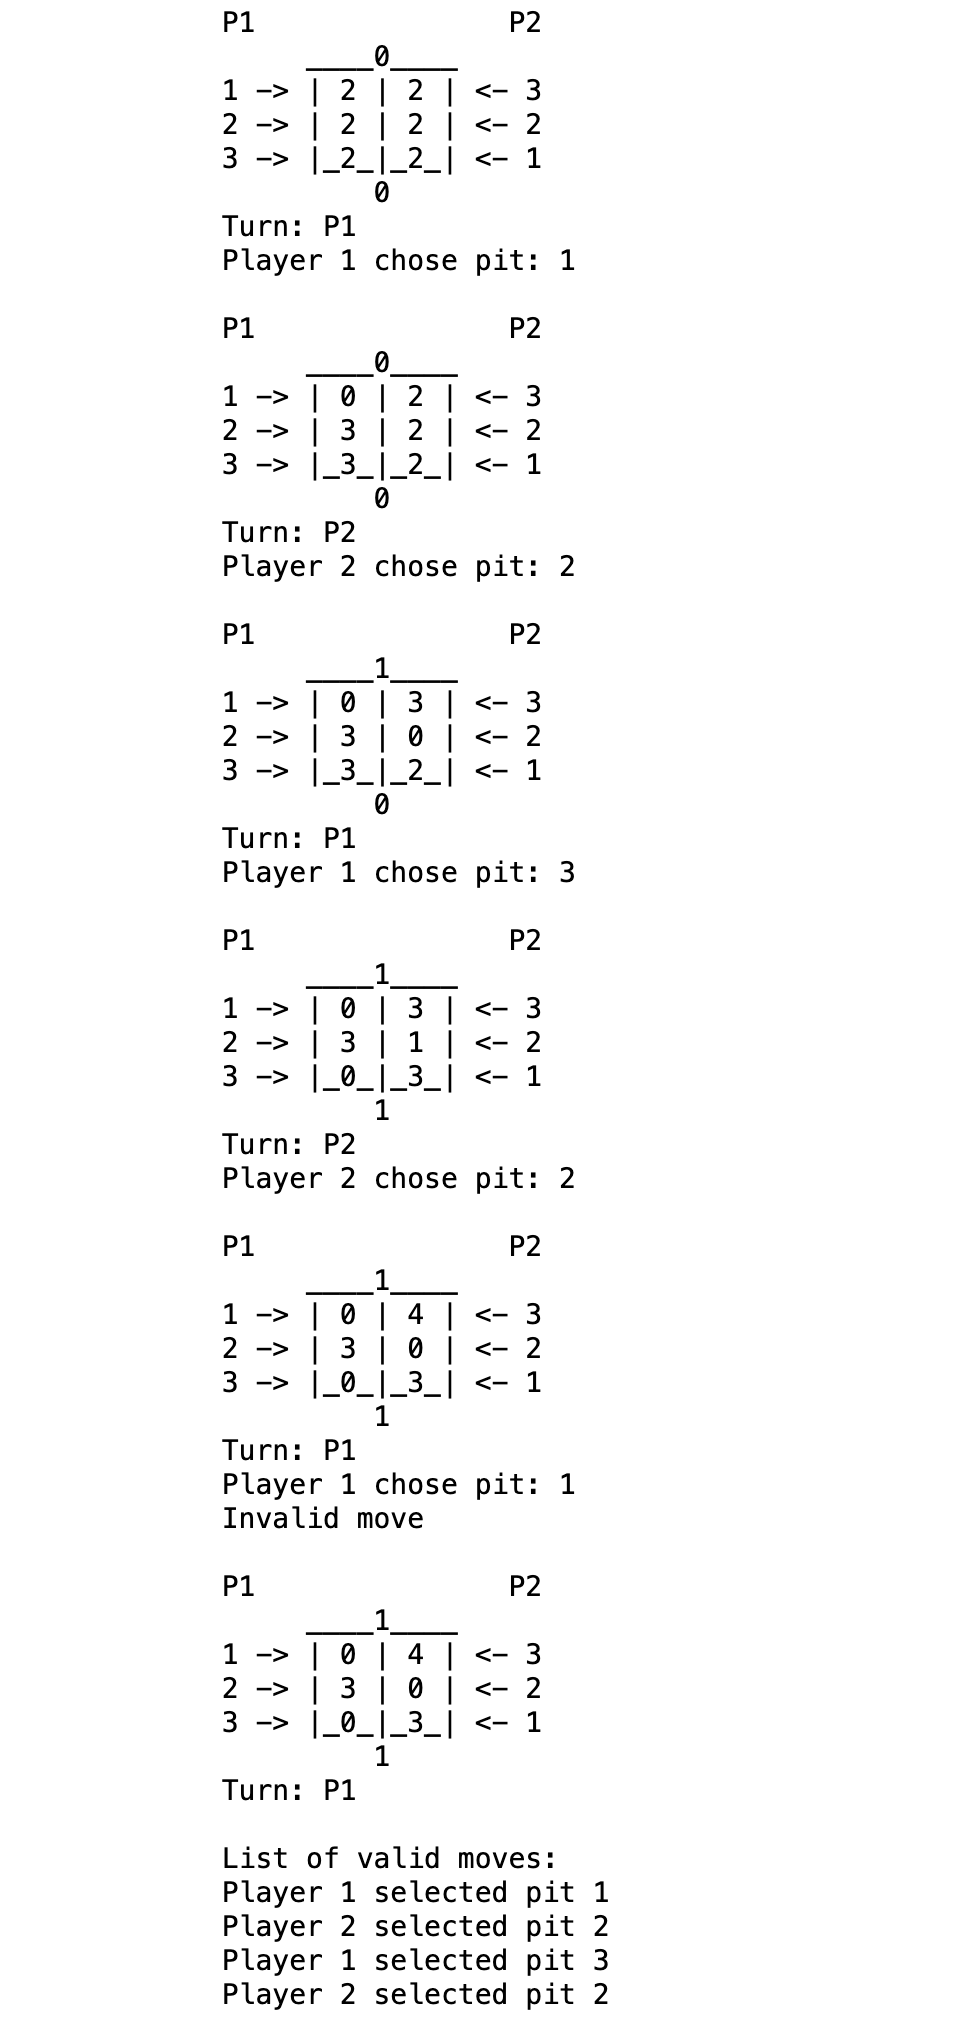

Now, we implement the random player part of the project.

In [5]:
def play_a_game():
    game = Mancala()
    winner, game_condition = game.winning_eval()
    counter = 1
    while not game_condition:
        # current player makes a move
        random_play = game.random_move_generator()

        game.play(random_play)

        
        winner, game_condition = game.winning_eval()
        counter += 1
    moves = {
        'Player 1' : 0,
        'Player 2' : 0
    }
    for i,_ in game.moves:
        if i == 1:
            moves['Player 1'] += 1
        else:
            moves['Player 2'] += 1

    return winner, moves



Result for 100 stimulation.

In [17]:
from collections import Counter
c = Counter()
size = 100
total_moves = {
    'Player 1' : 0,
    'Player 2' : 0
}
for _ in range(0,size):
    winner, moves = play_a_game()
    total_moves['Player 1'] += moves['Player 1']
    total_moves['Player 2'] += moves['Player 2']
    c[winner] += 1

print(c)
print(f"player 1 = {c['Player 1']/size}, player 2 = {c['Player 2']/size}, Tie = {c['Tie']/size}")
print(f"Average move per game for Player 1: {total_moves['Player 1']/size}, Average move per game for player 2: {total_moves['Player 2']/size}")

Counter({'Player 1': 52, 'Player 2': 40, 'Tie': 8})
player 1 = 0.52, player 2 = 0.4, Tie = 0.08
Average move per game for Player 1: 19.79, Average move per game for player 2: 19.28


Results for 500,000 stimulation.

In [12]:
from collections import Counter
c = Counter()
size = 500000
total_moves = {
    'Player 1' : 0,
    'Player 2' : 0
}
for _ in range(0,size):
    winner, moves = play_a_game()
    total_moves['Player 1'] += moves['Player 1']
    total_moves['Player 2'] += moves['Player 2']
    c[winner] += 1

print(c)
print(f"player 1 = {c['Player 1']/size}, player 2 = {c['Player 2']/size}, Tie = {c['Tie']/size}")
print(f"Average move per game for Player 1: {total_moves['Player 1']/size}, Average move per game for player 2: {total_moves['Player 2']/size}")

Counter({'Player 1': 240499, 'Player 2': 226057, 'Tie': 33444})
player 1 = 0.480998, player 2 = 0.452114, Tie = 0.066888
Average move per game for Player 1: 20.718798, Average move per game for player 2: 20.21707
